In this notebook we experimentally test if the condition number $\lambda$ in Zhong's paper is exponential.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [45]:
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.rcParams['figure.dpi'] = 140

In [52]:
def gen_matrices(N, d, M): 
    return ( 
        np.random.normal(loc=0, scale=1/np.sqrt(d), size=(N, d, M))
        * np.random.normal(loc=0, scale=1/np.sqrt(M), size=(N, 1, M))
    )

def get_lambda(data):
    _, s, _ = np.linalg.svd(data)
    l = np.prod(s, axis=-1) / (s[..., -1] ** s.shape[-1])
    return l

In [53]:
N_trials = 200
Ms = np.arange(1, 30)
ds = Ms * 2
lambda_median = []
for d, M in zip(ds, Ms):
    lambda_median.append( 
        np.median(get_lambda(gen_matrices(N_trials, d, M)))
    )

Text(0.5, 1.0, 'median of $\\lambda$ versus $M$ when $d=2M$ for 200 runs')

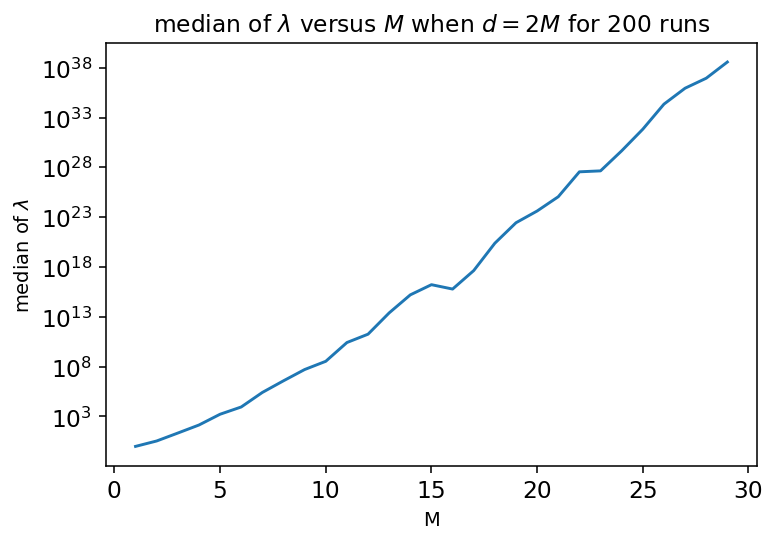

In [54]:
plt.plot( 
    Ms, 
    lambda_median,
)
plt.xlabel('M')
plt.ylabel('median of $\lambda$')
plt.yscale('log')
plt.title(f'median of $\lambda$ versus $M$ when $d=2M$ for {N_trials} runs')

In [ ]:

np.median(get_lambda(gen_matrices(100, 10, 5)))